In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
from sklearn.linear_model import Ridge, LinearRegression, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error as MSE
from yellowbrick.regressor import ManualAlphaSelection
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError
from yellowbrick.model_selection import FeatureImportances


In [2]:
Diamonds = pd.read_csv ('Diamonds 2022.csv')
Diamonds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [3]:
Diamonds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [4]:
Diamonds = Diamonds.drop ('Unnamed: 0', axis = 1)
Diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [5]:
Diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
Diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
Diamonds.rename(columns={"x":"length",
                "y":"width",
                "z":"height"}, inplace=True)

In [8]:
Diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'length',
       'width', 'height'],
      dtype='object')

#### Currency Exchange

As of July 26, 2022, 1 AUD is equivalent to .69 USD. Since this dataset is based on an Australian Diamond Dealers Inventory, the prices are listed in AUD. Thus a currency conversion is necessary. So we convert the prices from AUD to USD below.

In [9]:
Diamonds.price = Diamonds.price * .69
Diamonds

,carat,cut,color,clarity,depth,table,price,length,width,height
0,0.23,Ideal,E,SI2,61.5,55.0,224.94,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,224.94,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,225.63,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,230.46,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,231.15,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,1902.33,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,1902.33,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,1901.64,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,1901.64,5.74,5.73,3.43


#### The 4 C's of Diamonds

In the jewelry business, there are many factors that influence the price of diamonds. The most notable are what have been come to be known as "The 4 C's". <br />

__C__ arat = Size of the diamond (refers to the weight of the diamond) <br />
__C__ ut = Shape of the diamond <br />
__C__ olor = or rather how Color- __less__ the diamond is <br />
__C__ larity = The "cleanliness" of the diamond (how many inclusions/ imperfections are visible) <br />

<AxesSubplot:xlabel='clarity', ylabel='price'>

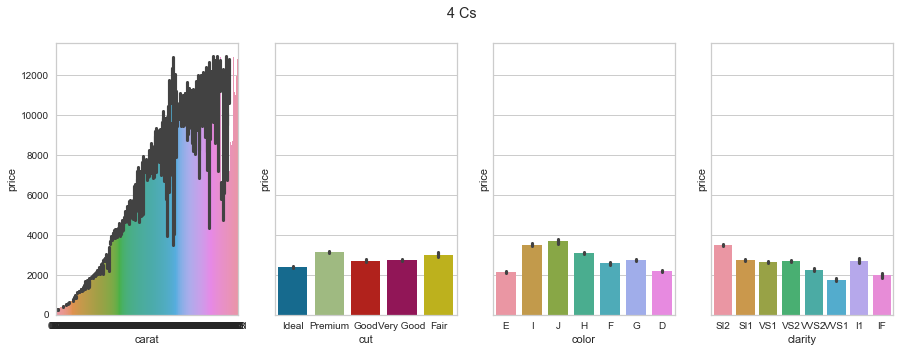

In [10]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)
fig.suptitle('4 Cs')

# Carat
sns.barplot(ax=axes[0], x=Diamonds.carat, y=Diamonds.price)

# Cut
sns.barplot(ax=axes[1], x=Diamonds.cut, y=Diamonds.price)

# Color
sns.barplot(ax=axes[2], x=Diamonds.color, y=Diamonds.price)

# Clarity
sns.barplot(ax=axes[3], x=Diamonds.clarity, y=Diamonds.price)

#### Other Column Definitions:

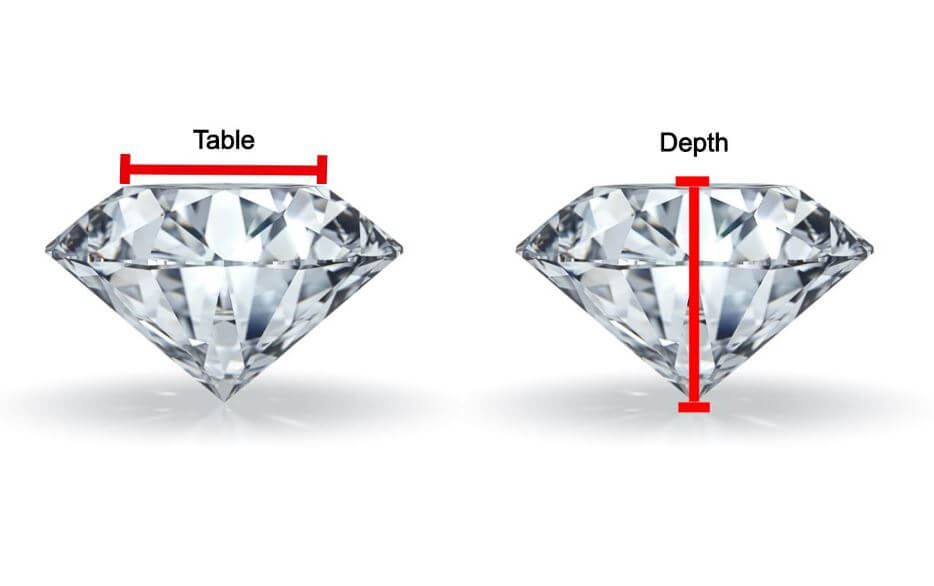

Depth percentage = height from top of the diamond (table) to the bottom / total diameter of the diamond <br />
Table percentage = distance from one edge of the top facet of the diamond to the furthest edge / total diameter of the diamond. <br />
length = length of the diamond <br />
width = width of the diamond <br />
width = height of the diamond <br />

<AxesSubplot:xlabel='height', ylabel='price'>

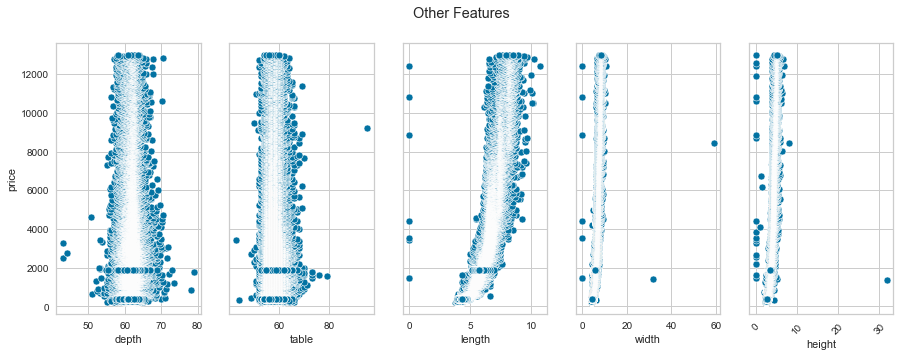

In [11]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5), sharey=True)
fig.suptitle('Other Features')

# Depth
sns.scatterplot(ax=axes[0], x=Diamonds.depth, y=Diamonds.price)
plt.xticks(rotation=45)
# Table
sns.scatterplot(ax=axes[1], x=Diamonds.table, y=Diamonds.price)
# X
sns.scatterplot(ax=axes[2], x=Diamonds.length, y=Diamonds.price)
# Y
sns.scatterplot(ax=axes[3], x=Diamonds.width, y=Diamonds.price)
# Z
sns.scatterplot(ax=axes[4], x=Diamonds.height, y=Diamonds.price)

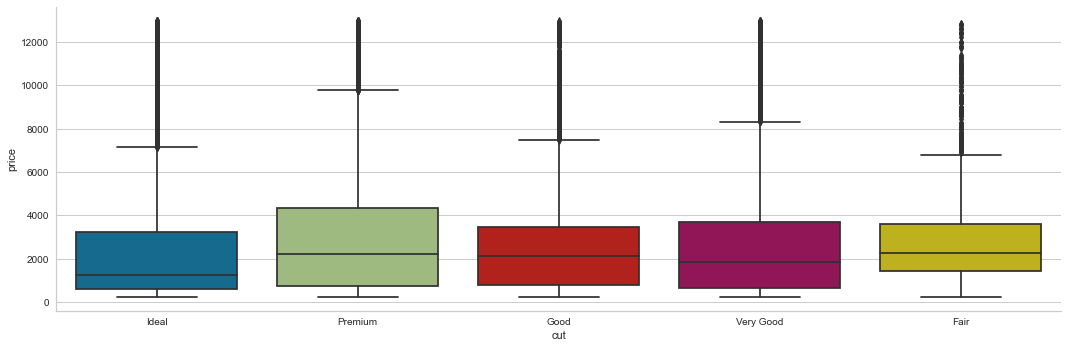

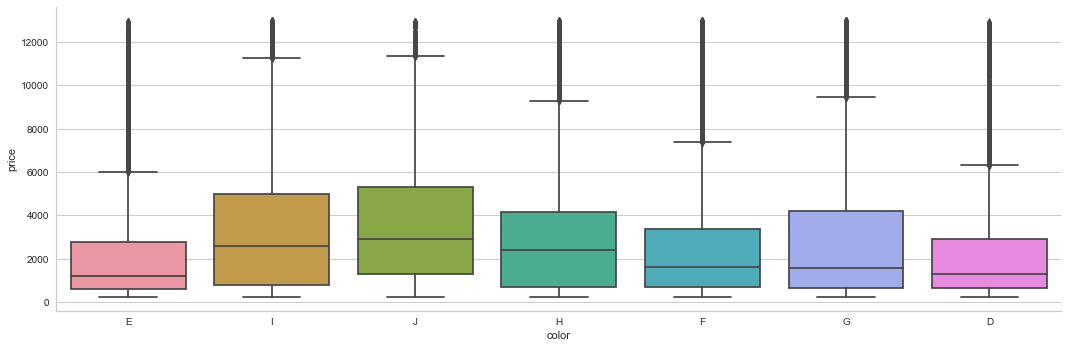

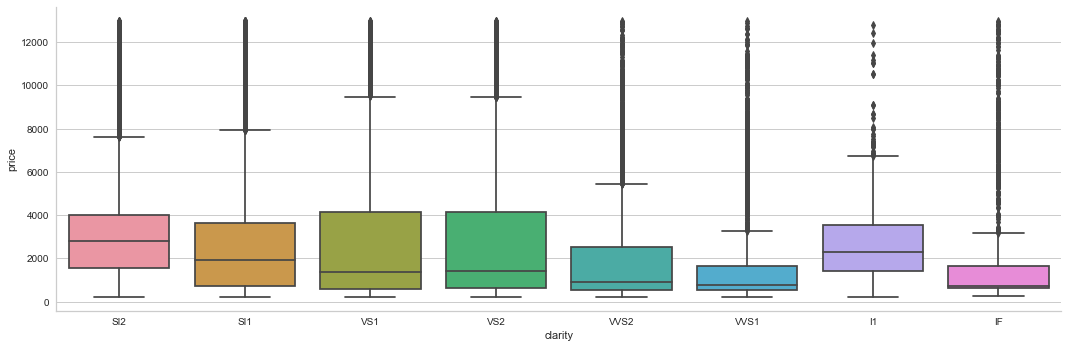

In [12]:
cat_columns = Diamonds.select_dtypes(include = ['object']).columns.tolist()

for col in cat_columns:
    sns.catplot(x=col, y="price",
            kind="box", dodge=False, height = 5, aspect = 3,data=Diamonds)

#### Relationship between all variables

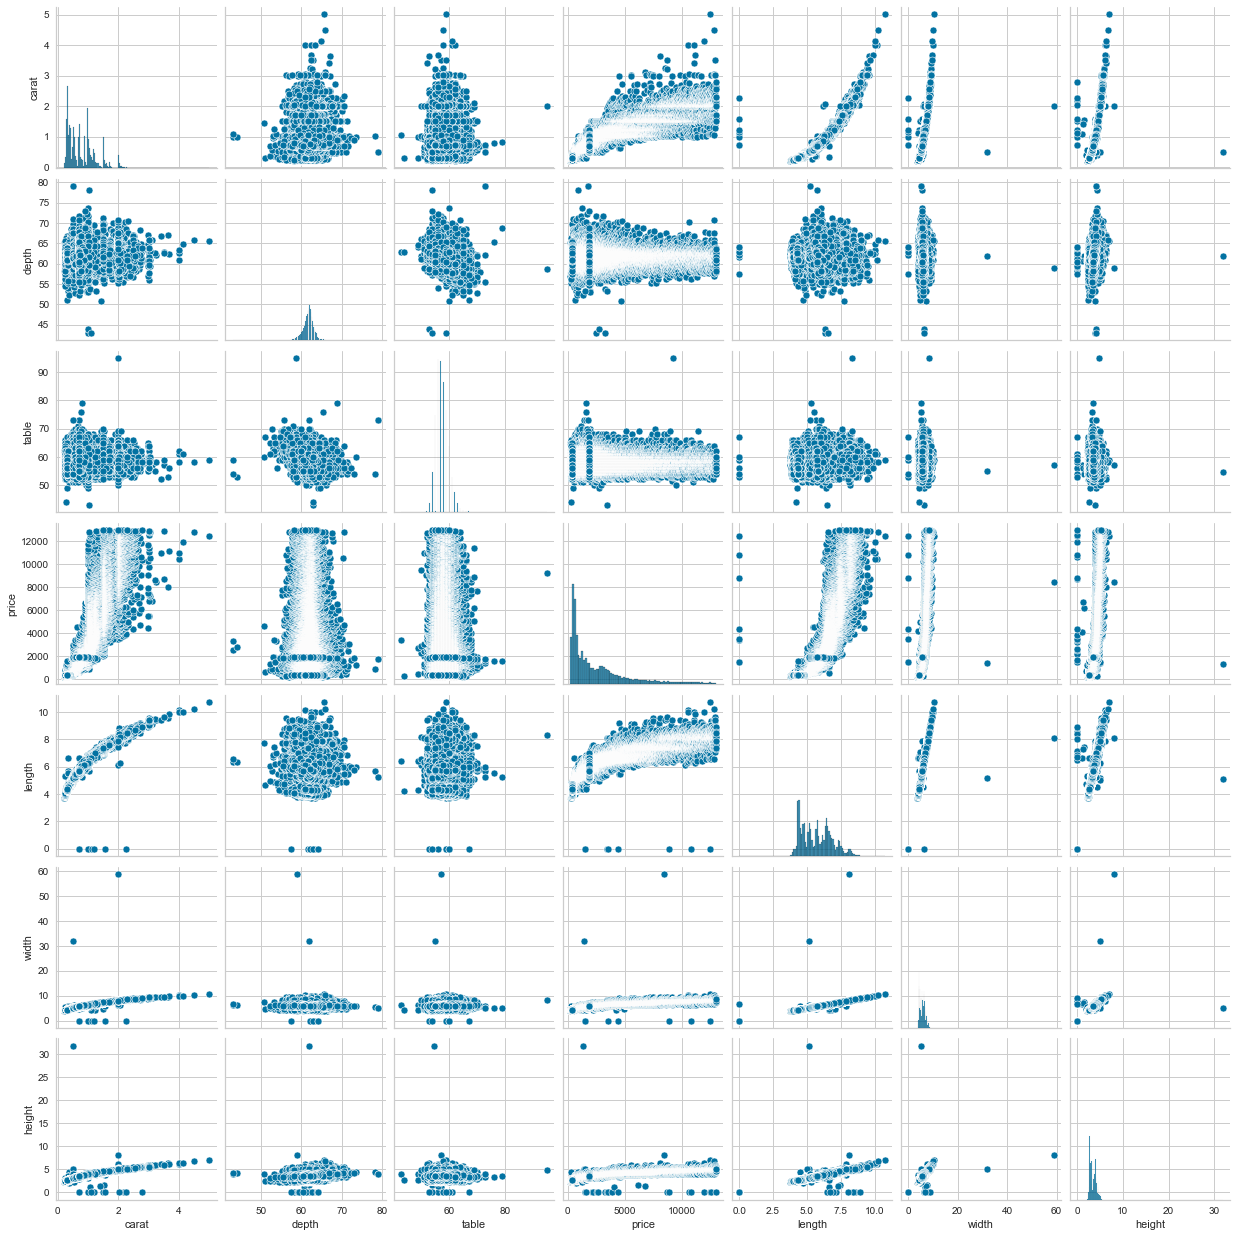

In [13]:
sns.pairplot(Diamonds);

#### Relationship between our dependent variable: price and independent variables with respect to carat

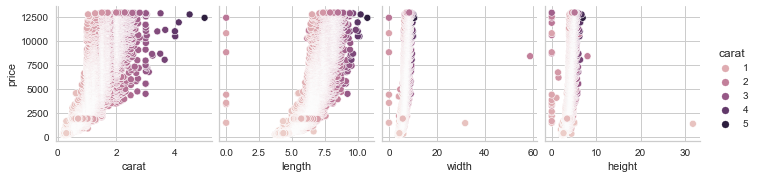

In [14]:
ax = sns.pairplot(data=Diamonds,
                y_vars=['price'],
                x_vars=['carat', 'length', 'width', 'height'], 
                hue= 'carat')

#### Relationship between our dependent variable: price and independent variables with respect to cut

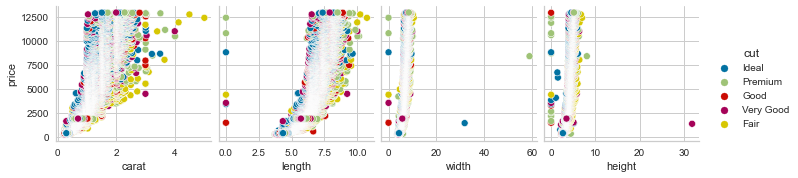

In [15]:
ax = sns.pairplot(data=Diamonds,
                y_vars=['price'],
                x_vars=['carat', 'length', 'width', 'height'], 
                hue= 'cut')

#### Relationship between our dependent variable: price and independent variables with respect to color

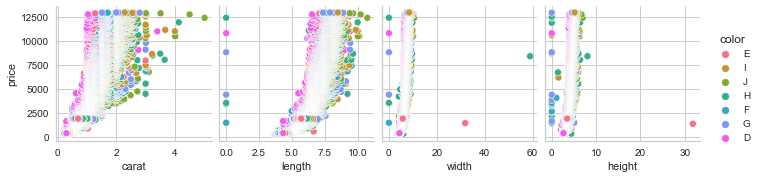

In [16]:
ax = sns.pairplot(data=Diamonds,
                y_vars=['price'],
                x_vars=['carat', 'length', 'width', 'height'], 
                hue= 'color')

#### Relationship between our dependent variable: price and independent variables with respect to clarity

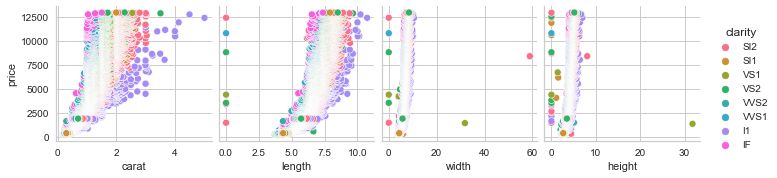

In [17]:
ax = sns.pairplot(data=Diamonds,
                y_vars=['price'],
                x_vars=['carat', 'length', 'width', 'height'], 
                hue= 'clarity')

#### From the graph we can see that length, width, and height has strong correlation with our target variable: price. Let's quantify this correlation by visualizing it on heatmap

<AxesSubplot:>

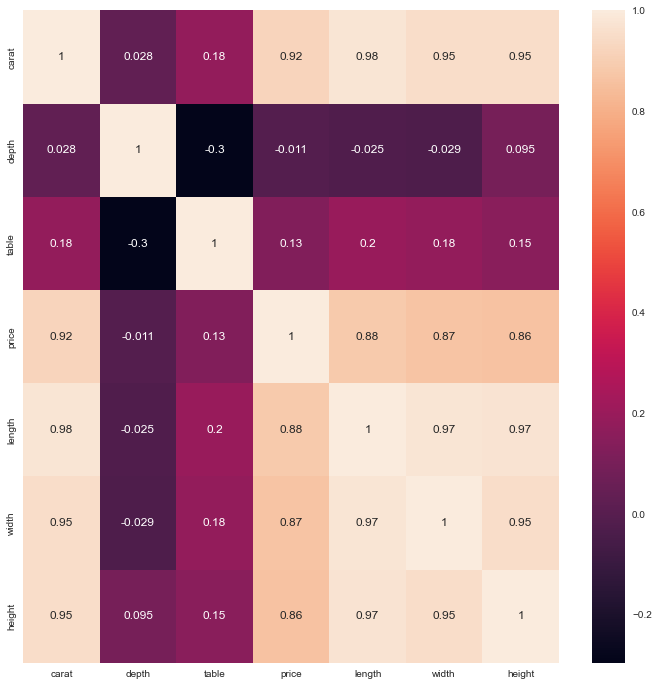

In [18]:
correl = Diamonds.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(correl, annot=True)

#### There is a strong positive correlation of carat, length, width, and height with price. Whereas, variables depth and table correlation with price is close to 0. So, they don't have high impact on price

### Define independent variables (X) and target variable (y):

In [19]:
X = Diamonds.drop(columns=["price"])
X

,carat,cut,color,clarity,depth,table,length,width,height
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,5.74,5.73,3.43


In [20]:
y=Diamonds[["price"]]
y

,price
0,224.94
1,224.94
2,225.63
3,230.46
4,231.15
...,...
53938,1902.33
53939,1902.33
53940,1901.64
53941,1901.64


### Train - Test Split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [22]:
col_cat = [ 'cut', 'color', 'clarity' ]
col_num = ['carat','depth', 'table',  'length','width', 'height' ]

X_train_cat = X_train[col_cat]
X_train_num = X_train[col_num]
X_test_cat = X_test[col_cat]
X_test_num = X_test[col_num]

In [23]:
pipe_cat = make_pipeline(SimpleImputer(strategy='constant'), OneHotEncoder(handle_unknown='ignore'))
pipe_num = make_pipeline(StandardScaler(), SimpleImputer())
preprocessor = make_column_transformer((pipe_cat, col_cat), (pipe_num, col_num))

In [24]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [25]:
Catcol=Diamonds.select_dtypes(include=["object"]).columns.tolist()
dummies= pd.get_dummies(Diamonds[Catcol],drop_first=True)
#Concat two dataframes
df=pd.concat([Diamonds,dummies],axis=1)

#drop original variables
df.drop(Catcol,axis=1,inplace=True)

In [26]:
traindf,testdf=train_test_split(df,test_size=0.1, random_state=0)
#List of Numerical Variables for later use
numericalcol=Diamonds.select_dtypes(include=np.number).columns.tolist()
# fit_transform() on train dataset
scaler_p=MinMaxScaler()
traindf[numericalcol]=scaler_p.fit_transform(traindf[numericalcol])
#transform() on test dataset
testdf[numericalcol]=scaler_p.transform(testdf[numericalcol])

In [27]:
y_train_p=traindf.pop("price")
X_train_p=traindf

#For test df
y_test_p=testdf.pop("price")
X_test_p=testdf

### Linear Regression

In [28]:
pipe_LR = make_pipeline(preprocessor , StandardScaler(), LinearRegression())

pipe_LR.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['cut', 'color', 'clarity']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer())]),
                                                  ['carat', 'depth', 'table',
                                                   'length', 'width',
                                                   'height'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [29]:
print("Score with Linear Regression: {:.2f}".format(pipe_LR.score(X_test, y_test)))

Score with Linear Regression: 0.92


In [30]:
pred = pipe_LR.predict(X_test)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE Score: % f" %(rmse))

RMSE Score:  759.677916


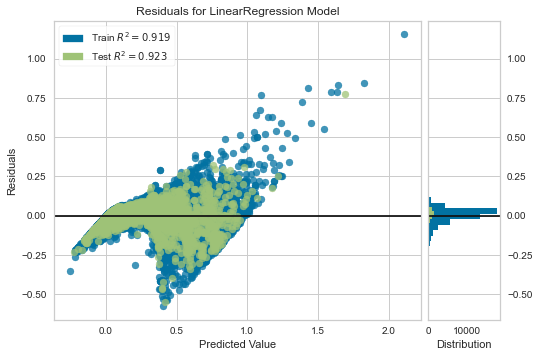

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [31]:
model_linear = LinearRegression()
visualizer_linear = ResidualsPlot(model_linear)

visualizer_linear.fit(X_train_p, y_train_p)
visualizer_linear.score(X_test_p, y_test_p)
visualizer_linear.show()

C:\Users\David\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

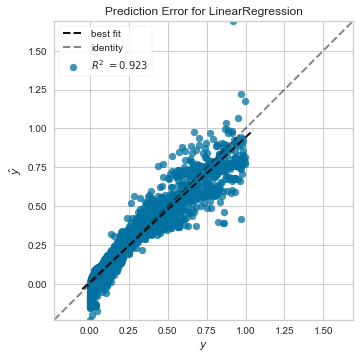

In [32]:
# Instantiate the linear model and visualizer
visualizer_linear_pred = PredictionError(model_linear) 
# fit visualizer on training data
visualizer_linear_pred.fit(X_train_p, y_train_p) 
#Evaluate on test data
visualizer_linear_pred.score(X_test_p, y_test_p)
#show the plot and save in given path
visualizer_linear_pred.show("prediction_error.jpg")

Residual: A residual is the vertical difference between the actual value and the predicted value. That is,
residual = actual y - predicted y

A common use of the residuals plot is to analyze the variance of the error of the regressor. Here the points on the scatterplot shows a curved pattern, we can conclude that a linear model is not appropriate and a non-linear model might fit better.

We can also see from the histogram that our error is normally distributed around zero, which also generally indicates a well fitted model. This is why we are getting a score of 0.92

### Linear Regression with Polynomial Features

In [33]:
pipe_LR_Poly = make_pipeline(preprocessor ,PolynomialFeatures(), StandardScaler(),LinearRegression())
param_grid_LR_Poly = {'polynomialfeatures__degree': range(1,4)}

grid_LR_Poly = GridSearchCV(pipe_LR_Poly, param_grid=param_grid_LR_Poly, cv=4, n_jobs=-2,return_train_score=True)
grid_LR_Poly.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['cut',
                                                                          'color',
                                                                          'clarity']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler()),
                                                                                         ('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         ['carat',
                                                                          'depth',
                                                                          'table',
                                                                          'length',
                                                                          'width',
                                                                          'height'])])),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-2, param_grid={'polynomialfeatures__degree': range(1, 4)},
             return_train_score=True)

In [34]:
result_LR_Poly = pd.DataFrame(grid_LR_Poly.cv_results_)
result_LR_Poly

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_polynomialfeatures__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.229028,0.011926,0.035835,0.004456,1,{'polynomialfeatures__degree': 1},9.202587e-01,9.172566e-01,9.186592e-01,9.206067e-01,9.191953e-01,1.338724e-03,1,0.919131,0.920131,0.919538,0.918968,0.919442,0.000449
1,2.675546,0.016455,0.209066,0.012770,2,{'polynomialfeatures__degree': 2},9.651484e-01,8.098739e-01,-4.432409e-01,9.700488e-01,5.754575e-01,5.916627e-01,2,0.972363,0.971965,0.971316,0.971693,0.971834,0.000383
2,61.488080,0.704984,0.758755,0.052125,3,{'polynomialfeatures__degree': 3},-1.486731e+21,-1.420336e+22,-3.305228e+21,-7.199979e+21,-6.548826e+21,4.877543e+21,3,0.982136,0.982336,0.982340,0.982680,0.982373,0.000195


In [35]:
grid_LR_Poly.best_params_

{'polynomialfeatures__degree': 1}

In [36]:
print("Score with Linear Regression and poly features: {:.2f}".format(grid_LR_Poly.score(X_test, y_test)))

Score with Linear Regression and poly features: 0.92


In [37]:
pred = grid_LR_Poly.predict(X_test)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE Score: % f" %(rmse))

RMSE Score:  759.657221


### Ridge

In [38]:
np.set_printoptions(suppress=True, precision=3)
pipe_Ridge = make_pipeline( StandardScaler(), Ridge(random_state=0))
param_grid_Ridge = {'ridge__alpha': np.logspace(-3, 3, 13)}

grid_Ridge = GridSearchCV(pipe_Ridge, param_grid=param_grid_Ridge, cv=5, n_jobs=-2,return_train_score=True)
grid_Ridge.fit(X_train_preprocessed, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('ridge', Ridge(random_state=0))]),
             n_jobs=-2,
             param_grid={'ridge__alpha': array([   0.001,    0.003,    0.01 ,    0.032,    0.1  ,    0.316,
          1.   ,    3.162,   10.   ,   31.623,  100.   ,  316.228,
       1000.   ])},
             return_train_score=True)

In [39]:
result_Ridge = pd.DataFrame(grid_Ridge.cv_results_)
result_Ridge

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ridge__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.052180,0.023497,0.004067,0.001813,0.001,{'ridge__alpha': 0.001},0.920199,0.920295,0.913018,0.923201,...,0.919287,0.003366,8,0.919225,0.919210,0.921000,0.918486,0.919352,0.919455,0.000831
1,0.081940,0.009857,0.009424,0.007502,0.003162,{'ridge__alpha': 0.0031622776601683794},0.920199,0.920295,0.913018,0.923201,...,0.919287,0.003366,7,0.919225,0.919210,0.921000,0.918486,0.919352,0.919455,0.000831
2,0.083328,0.003121,0.005754,0.000673,0.01,{'ridge__alpha': 0.01},0.920199,0.920295,0.913018,0.923201,...,0.919287,0.003366,6,0.919225,0.919210,0.921000,0.918486,0.919352,0.919455,0.000831
3,0.091562,0.006891,0.009226,0.001278,0.031623,{'ridge__alpha': 0.03162277660168379},0.920199,0.920295,0.913018,0.923201,...,0.919287,0.003366,5,0.919225,0.919210,0.921000,0.918486,0.919352,0.919455,0.000831
4,0.106244,0.011447,0.009721,0.000920,0.1,{'ridge__alpha': 0.1},0.920199,0.920295,0.913019,0.923201,...,0.919287,0.003366,4,0.919225,0.919210,0.921000,0.918486,0.919352,0.919455,0.000831
5,0.111203,0.004362,0.009027,0.001382,0.316228,{'ridge__alpha': 0.31622776601683794},0.920198,0.920294,0.913020,0.923202,...,0.919287,0.003365,3,0.919225,0.919210,0.921000,0.918486,0.919352,0.919455,0.000831
6,0.115766,0.007584,0.008630,0.001316,1.0,{'ridge__alpha': 1.0},0.920196,0.920292,0.913026,0.923203,...,0.919287,0.003363,2,0.919225,0.919210,0.921000,0.918486,0.919352,0.919455,0.000831
7,0.113683,0.003428,0.009325,0.003456,3.162278,{'ridge__alpha': 3.1622776601683795},0.920190,0.920287,0.913043,0.923208,...,0.919288,0.003357,1,0.919225,0.919209,0.921000,0.918486,0.919352,0.919454,0.000831
8,0.111898,0.003900,0.008729,0.001618,10.0,{'ridge__alpha': 10.0},0.920168,0.920266,0.913093,0.923217,...,0.919287,0.003338,9,0.919221,0.919206,0.920996,0.918482,0.919348,0.919451,0.000831
9,0.108921,0.003557,0.008333,0.000658,31.622777,{'ridge__alpha': 31.622776601683793},0.920078,0.920186,0.913216,0.923202,...,0.919257,0.003278,10,0.919189,0.919175,0.920961,0.918449,0.919318,0.919418,0.000830


In [40]:
grid_Ridge.best_params_

{'ridge__alpha': 3.1622776601683795}

In [41]:
grid_Ridge.best_score_

0.9192879729892072

In [42]:
print("Score with Ridge Regression: {:.2f}".format(grid_Ridge.score(X_test_preprocessed, y_test)))

Score with Ridge Regression: 0.92


In [43]:
pred = grid_Ridge.predict(X_test_preprocessed)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE Score: % f" %(rmse))

RMSE Score:  759.711562


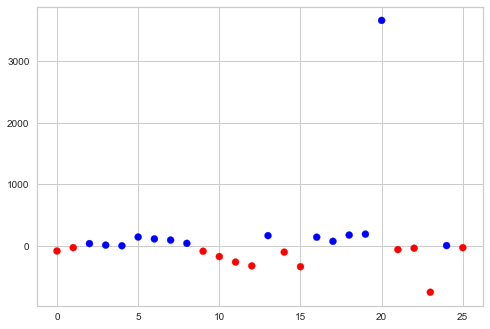

In [44]:
ridge = grid_Ridge.best_estimator_
plt.scatter(range(X_train_preprocessed.shape[1]), ridge["ridge"].coef_, c=np.sign(ridge["ridge"].coef_), cmap="bwr_r")

In [45]:
print(X_train_preprocessed.shape)
np.sum(ridge["ridge"].coef_ != 0)

(48548, 26)


26

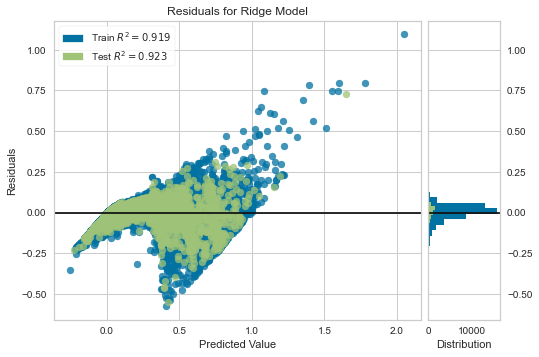

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [46]:
# Instantiate the visualizer
model_ridge = Ridge()
visualizer_ridge = ResidualsPlot(model_ridge)

visualizer_ridge.fit(X_train_p, y_train_p)
visualizer_ridge.score(X_test_p, y_test_p)
visualizer_ridge.show()

Again, the points are scattered in a curved shape which proves that linear regression is not an optimal model for this dataset. So, even if the score is 0.92, it is not the best model

C:\Users\David\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


<AxesSubplot:title={'center':'Prediction Error for Ridge'}, xlabel='$y$', ylabel='$\\hat{y}$'>

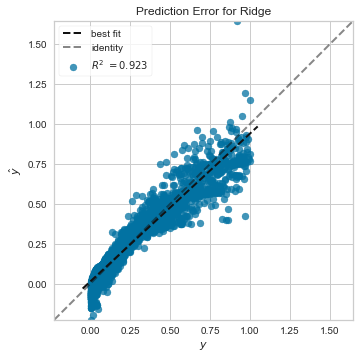

In [47]:
visualizer_ridge_pred = PredictionError(model_ridge) 
# fit visualizer on training data
visualizer_ridge_pred.fit(X_train_p, y_train_p) 
#Evaluate on test data
visualizer_ridge_pred.score(X_test_p, y_test_p)
#show the plot and save in given path
visualizer_ridge_pred.show("prediction_error.jpg")

C:\Users\David\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


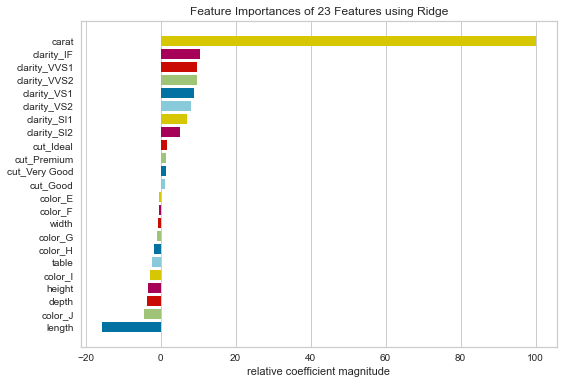

<AxesSubplot:title={'center':'Feature Importances of 23 Features using Ridge'}, xlabel='relative coefficient magnitude'>

In [48]:
viz_Ridge = FeatureImportances(model_ridge)
viz_Ridge.fit(X_train_p, y_train_p)
viz_Ridge.show()

### Ridge with Polynomial Features

In [49]:
np.set_printoptions(suppress=True, precision=3)
pipe_Ridge_Poly = make_pipeline(preprocessor, PolynomialFeatures(), StandardScaler(), Ridge(random_state=0))
param_grid_Ridge_Poly = {'polynomialfeatures__degree': range(1,3),'ridge__alpha': np.logspace(-3, 3, 13)}

grid_Ridge_Poly = GridSearchCV(pipe_Ridge_Poly, param_grid=param_grid_Ridge_Poly, cv=5, n_jobs=-2,return_train_score=True)
grid_Ridge_Poly.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['cut',
                                                                          'color',
                                                                          'clarity']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler()),
                                                                                         ('simpleimputer',
                                                                                          S...
                                                                         ['carat',
                                                                          'depth',
                                                                          'table',
                                                                          'length',
                                                                          'width',
                                                                          'height'])])),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('ridge', Ridge(random_state=0))]),
             n_jobs=-2,
             param_grid={'polynomialfeatures__degree': range(1, 3),
                         'ridge__alpha': array([   0.001,    0.003,    0.01 ,    0.032,    0.1  ,    0.316,
          1.   ,    3.162,   10.   ,   31.623,  100.   ,  316.228,
       1000.   ])},
             return_train_score=True)

In [50]:
result_Ridge_Poly = pd.DataFrame(grid_Ridge_Poly.cv_results_)
result_Ridge_Poly

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_polynomialfeatures__degree,param_ridge__alpha,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.148226,0.012206,0.039261,0.003299,1,0.001,"{'polynomialfeatures__degree': 1, 'ridge__alph...",0.920199,0.920295,0.913018,...,0.919287,0.003366,8,0.919225,0.919210,0.921000,0.918486,0.919352,0.919455,0.000831
1,0.216751,0.009087,0.045731,0.006804,1,0.003162,"{'polynomialfeatures__degree': 1, 'ridge__alph...",0.920199,0.920295,0.913018,...,0.919287,0.003366,7,0.919225,0.919210,0.921000,0.918486,0.919352,0.919455,0.000831
2,0.240262,0.007247,0.043648,0.006444,1,0.01,"{'polynomialfeatures__degree': 1, 'ridge__alph...",0.920199,0.920295,0.913018,...,0.919287,0.003366,6,0.919225,0.919210,0.921000,0.918486,0.919352,0.919455,0.000831
3,0.241949,0.004561,0.040573,0.007485,1,0.031623,"{'polynomialfeatures__degree': 1, 'ridge__alph...",0.920199,0.920295,0.913018,...,0.919287,0.003366,5,0.919225,0.919210,0.921000,0.918486,0.919352,0.919455,0.000831
4,0.251175,0.008804,0.052178,0.010524,1,0.1,"{'polynomialfeatures__degree': 1, 'ridge__alph...",0.920199,0.920295,0.913019,...,0.919287,0.003366,4,0.919225,0.919210,0.921000,0.918486,0.919352,0.919455,0.000831
5,0.254844,0.010011,0.040672,0.002218,1,0.316228,"{'polynomialfeatures__degree': 1, 'ridge__alph...",0.920198,0.920294,0.913020,...,0.919287,0.003365,3,0.919225,0.919210,0.921000,0.918486,0.919352,0.919455,0.000831
6,0.244032,0.011949,0.046227,0.001231,1,1.0,"{'polynomialfeatures__degree': 1, 'ridge__alph...",0.920196,0.920292,0.913026,...,0.919287,0.003363,2,0.919225,0.919210,0.921000,0.918486,0.919352,0.919455,0.000831
7,0.282819,0.015932,0.047418,0.002422,1,3.162278,"{'polynomialfeatures__degree': 1, 'ridge__alph...",0.920190,0.920287,0.913043,...,0.919288,0.003357,1,0.919225,0.919209,0.921000,0.918486,0.919352,0.919454,0.000831
8,0.264864,0.004557,0.043351,0.002401,1,10.0,"{'polynomialfeatures__degree': 1, 'ridge__alph...",0.920168,0.920266,0.913093,...,0.919287,0.003338,9,0.919221,0.919206,0.920996,0.918482,0.919348,0.919451,0.000831
9,0.249686,0.006644,0.041863,0.000595,1,31.622777,"{'polynomialfeatures__degree': 1, 'ridge__alph...",0.920078,0.920186,0.913216,...,0.919257,0.003278,10,0.919189,0.919175,0.920961,0.918449,0.919318,0.919418,0.000830


In [51]:
grid_Ridge_Poly.best_params_

{'polynomialfeatures__degree': 1, 'ridge__alpha': 3.1622776601683795}

In [52]:
grid_Ridge_Poly.best_score_

0.919287972989207

In [53]:
print("Score with Ridge and Polynomial Regression: {:.2f}".format(grid_Ridge_Poly.score(X_test, y_test)))

Score with Ridge and Polynomial Regression: 0.92


In [54]:
pred = grid_Ridge_Poly.predict(X_test)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE Score: % f" %(rmse))

RMSE Score:  759.711562


### Lasso 

In [55]:
pipe_Lasso = make_pipeline(StandardScaler(),Lasso(max_iter=100000,random_state=0))
param_grid_Lasso = {'lasso__alpha': np.logspace(-3, 0, 13)}

grid_Lasso = GridSearchCV(pipe_Lasso, param_grid=param_grid_Lasso, cv=5, n_jobs=-2,return_train_score=True)
grid_Lasso.fit(X_train_preprocessed, y_train.values.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('lasso',
                                        Lasso(max_iter=100000,
                                              random_state=0))]),
             n_jobs=-2,
             param_grid={'lasso__alpha': array([0.001, 0.002, 0.003, 0.006, 0.01 , 0.018, 0.032, 0.056, 0.1  ,
       0.178, 0.316, 0.562, 1.   ])},
             return_train_score=True)

In [56]:
result_Lasso = pd.DataFrame(grid_Lasso.cv_results_)
result_Lasso

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lasso__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,945.462252,5.321588,0.011706,0.000920,0.001,{'lasso__alpha': 0.001},0.920199,0.920295,0.913018,0.923201,...,0.919287,0.003366,13,0.919225,0.919210,0.921000,0.918486,0.919352,0.919455,0.000831
1,935.570531,11.095753,0.011904,0.000313,0.001778,{'lasso__alpha': 0.0017782794100389228},0.920199,0.920295,0.913018,0.923202,...,0.919287,0.003366,12,0.919225,0.919210,0.921000,0.918486,0.919352,0.919455,0.000831
2,677.859154,14.368969,0.011507,0.000372,0.003162,{'lasso__alpha': 0.0031622776601683794},0.920199,0.920295,0.913018,0.923202,...,0.919287,0.003366,11,0.919225,0.919210,0.921000,0.918486,0.919352,0.919455,0.000831
3,384.381533,7.201072,0.012598,0.002165,0.005623,{'lasso__alpha': 0.005623413251903491},0.920198,0.920295,0.913019,0.923203,...,0.919287,0.003366,10,0.919225,0.919210,0.921000,0.918486,0.919352,0.919455,0.000831
4,208.841329,3.688175,0.003968,0.003993,0.01,{'lasso__alpha': 0.01},0.920198,0.920295,0.913020,0.923205,...,0.919288,0.003366,9,0.919225,0.919210,0.921000,0.918486,0.919352,0.919455,0.000831
5,121.885455,3.419918,0.011110,0.001818,0.017783,{'lasso__alpha': 0.01778279410038923},0.920198,0.920294,0.913022,0.923208,...,0.919289,0.003366,8,0.919225,0.919210,0.921000,0.918486,0.919352,0.919455,0.000831
6,68.479194,1.705212,0.011210,0.000243,0.031623,{'lasso__alpha': 0.03162277660168379},0.920197,0.920294,0.913025,0.923213,...,0.919290,0.003366,7,0.919225,0.919210,0.921000,0.918486,0.919352,0.919455,0.000831
7,38.337398,0.485744,0.011407,0.000444,0.056234,{'lasso__alpha': 0.05623413251903491},0.920196,0.920293,0.913030,0.923221,...,0.919292,0.003366,6,0.919225,0.919210,0.921000,0.918486,0.919352,0.919455,0.000831
8,21.499420,0.666809,0.011210,0.000243,0.1,{'lasso__alpha': 0.1},0.920193,0.920292,0.913039,0.923236,...,0.919295,0.003366,5,0.919225,0.919209,0.921000,0.918486,0.919352,0.919454,0.000831
9,11.886433,0.305961,0.010515,0.001549,0.177828,{'lasso__alpha': 0.1778279410038923},0.920189,0.920289,0.913056,0.923257,...,0.919300,0.003364,3,0.919225,0.919209,0.921000,0.918485,0.919352,0.919454,0.000831


In [57]:
grid_Lasso.best_params_

{'lasso__alpha': 0.5623413251903491}

In [58]:
grid_Lasso.best_score_

0.9193092947471083

In [59]:
grid_Lasso.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso',
                 Lasso(alpha=0.5623413251903491, max_iter=100000,
                       random_state=0))])

In [60]:
print("Score with Lasso Regression: {:.2f}".format(grid_Lasso.score(X_test_preprocessed, y_test)))

Score with Lasso Regression: 0.92


In [61]:
pred = grid_Lasso.predict(X_test_preprocessed)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE Score: % f" %(rmse))

RMSE Score:  759.802888


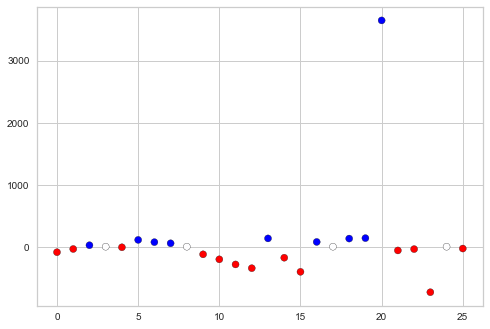

In [62]:
lasso = grid_Lasso.best_estimator_
plt.scatter(range(X_train_preprocessed.shape[1]), lasso['lasso'].coef_, c=np.sign(lasso['lasso'].coef_), cmap="bwr_r", edgecolor='k')

In [63]:
np.sum(lasso['lasso'].coef_ == 0)

4

In [64]:
np.sum(lasso['lasso'].coef_ != 0)

22

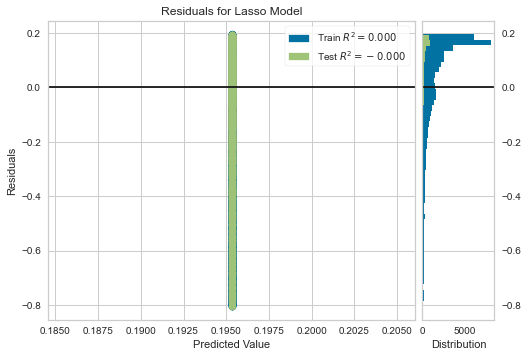

<AxesSubplot:title={'center':'Residuals for Lasso Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [65]:
# Instantiate the visualizer
model_lasso = Lasso(max_iter=1000000)
visualizer_lasso = ResidualsPlot(model_lasso)

visualizer_lasso.fit(X_train_p, y_train_p)
visualizer_lasso.score(X_test_p, y_test_p)
visualizer_lasso.show()

C:\Users\David\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


<AxesSubplot:title={'center':'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

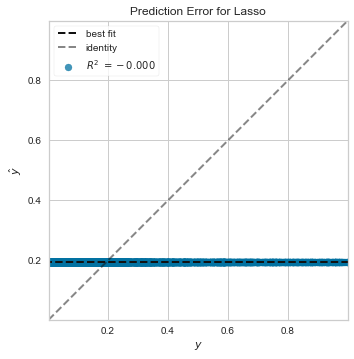

In [66]:
visualizer_lasso_pred = PredictionError(model_lasso) 
# fit visualizer on training data
visualizer_lasso_pred.fit(X_train_p, y_train_p) 
#Evaluate on test data
visualizer_lasso_pred.score(X_test_p, y_test_p)
#show the plot and save in given path
visualizer_lasso_pred.show("prediction_error.jpg")

In [67]:
lasso = grid_Lasso.best_estimator_

In [68]:
np.sum(lasso['lasso'].coef_ != 0)

22

In [69]:
lasso['lasso'].coef_

array([ -88.521,  -36.78 ,   23.931,    0.   ,   -9.207,  109.742,
         73.647,   55.177,   -0.   , -122.692, -203.338, -285.603,
       -346.196,  133.884, -177.632, -404.995,   76.828,   -0.   ,
        131.016,  138.385, 3647.754,  -60.176,  -38.305, -733.499,
         -0.   ,  -29.621])

### Elastic Net

In [70]:
pipe_ElasticNet = make_pipeline(preprocessor , StandardScaler(), ElasticNet(max_iter=100000,random_state=0))
param_grid_ElasticNet = {'elasticnet__alpha': np.logspace(-3, -1, 5), 'elasticnet__l1_ratio': [0.01, .1, .5, .9, 1]}

grid_ElasticNet= GridSearchCV(pipe_ElasticNet, param_grid=param_grid_ElasticNet, cv=5, n_jobs=-2,return_train_score=True)
grid_ElasticNet.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['cut',
                                                                          'color',
                                                                          'clarity']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler()),
                                                                                         ('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         ['carat',
                                                                          'depth',
                                                                          'table',
                                                                          'length',
                                                                          'width',
                                                                          'height'])])),
                                       ('standardscaler', StandardScaler()),
                                       ('elasticnet',
                                        ElasticNet(max_iter=100000,
                                                   random_state=0))]),
             n_jobs=-2,
             param_grid={'elasticnet__alpha': array([0.001, 0.003, 0.01 , 0.032, 0.1  ]),
                         'elasticnet__l1_ratio': [0.01, 0.1, 0.5, 0.9, 1]},
             return_train_score=True)

In [71]:
result_ElasticNet = pd.DataFrame(grid_ElasticNet.cv_results_)
result_ElasticNet

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_elasticnet__alpha,param_elasticnet__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,57.015256,0.376943,0.048806,0.002119,0.001,0.01,"{'elasticnet__alpha': 0.001, 'elasticnet__l1_r...",0.920043,0.920155,0.913247,...,0.919241,0.003259,10,0.919173,0.919159,0.920943,0.918432,0.919302,0.919402,0.000829
1,50.240198,0.324712,0.048410,0.004573,0.001,0.1,"{'elasticnet__alpha': 0.001, 'elasticnet__l1_r...",0.920061,0.920171,0.913231,...,0.919250,0.003268,9,0.919181,0.919168,0.920952,0.918441,0.919311,0.919411,0.000829
2,68.949502,0.400768,0.048112,0.001802,0.001,0.5,"{'elasticnet__alpha': 0.001, 'elasticnet__l1_r...",0.920132,0.920234,0.913152,...,0.919279,0.003312,8,0.919211,0.919196,0.920985,0.918472,0.919339,0.919440,0.000830
3,242.410384,1.700177,0.051187,0.001382,0.001,0.9,"{'elasticnet__alpha': 0.001, 'elasticnet__l1_r...",0.920188,0.920285,0.913049,...,0.919288,0.003355,3,0.919225,0.919209,0.921000,0.918486,0.919351,0.919454,0.000831
4,757.799816,2.013481,0.013100,0.002087,0.001,1,"{'elasticnet__alpha': 0.001, 'elasticnet__l1_r...",0.920199,0.920295,0.913018,...,0.919287,0.003366,6,0.919225,0.919210,0.921000,0.918486,0.919352,0.919455,0.000831
5,18.055973,0.140886,0.047616,0.003549,0.003162,0.01,"{'elasticnet__alpha': 0.0031622776601683794, '...",0.919444,0.919644,0.913405,...,0.918862,0.003029,14,0.918790,0.918789,0.920537,0.918050,0.918937,0.919021,0.000819
6,15.934186,0.380378,0.048806,0.002851,0.003162,0.1,"{'elasticnet__alpha': 0.0031622776601683794, '...",0.919539,0.919724,0.913401,...,0.918927,0.003059,13,0.918857,0.918854,0.920607,0.918117,0.919002,0.919087,0.000821
7,21.957208,0.276385,0.048807,0.003051,0.003162,0.5,"{'elasticnet__alpha': 0.0031622776601683794, '...",0.919908,0.920038,0.913325,...,0.919167,0.003194,12,0.919098,0.919087,0.920863,0.918357,0.919232,0.919328,0.000827
8,76.475501,0.772659,0.050102,0.000934,0.003162,0.9,"{'elasticnet__alpha': 0.0031622776601683794, '...",0.920160,0.920259,0.913108,...,0.919286,0.003332,7,0.919219,0.919204,0.920994,0.918480,0.919347,0.919449,0.000831
9,580.835083,6.899667,0.027576,0.008070,0.003162,1,"{'elasticnet__alpha': 0.0031622776601683794, '...",0.920199,0.920295,0.913018,...,0.919287,0.003366,5,0.919225,0.919210,0.921000,0.918486,0.919352,0.919455,0.000831


In [72]:
grid_ElasticNet.best_params_

{'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 1}

In [73]:
grid_ElasticNet.best_score_

0.9192952397997113

In [74]:
print("Score with ElasticNet Regression: {:.2f}".format(grid_ElasticNet.score(X_test, y_test)))

Score with ElasticNet Regression: 0.92


In [75]:
pred = grid_ElasticNet.predict(X_test)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE Score: % f" %(rmse))

RMSE Score:  759.703092


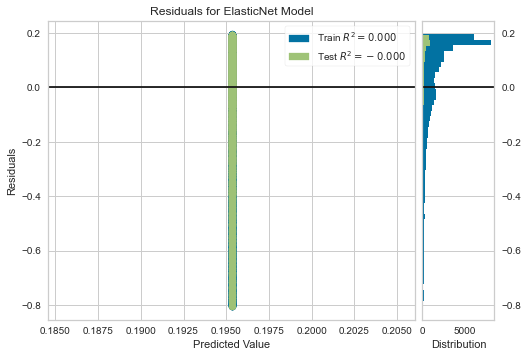

<AxesSubplot:title={'center':'Residuals for ElasticNet Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [76]:
# Instantiate the visualizer
model_EN = ElasticNet(max_iter=100000)
visualizer_EN = ResidualsPlot(model_EN)

visualizer_EN.fit(X_train_p, y_train_p)
visualizer_EN.score(X_test_p, y_test_p)
visualizer_EN.show()

C:\Users\David\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


<AxesSubplot:title={'center':'Prediction Error for ElasticNet'}, xlabel='$y$', ylabel='$\\hat{y}$'>

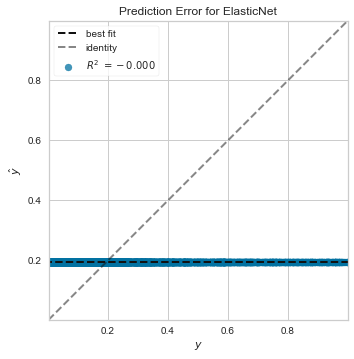

In [77]:
visualizer_EN_pred = PredictionError(model_EN) 
# fit visualizer on training data
visualizer_EN_pred.fit(X_train_p, y_train_p) 
#Evaluate on test data
visualizer_EN_pred.score(X_test_p, y_test_p)
#show the plot and save in given path
visualizer_EN_pred.show("prediction_error.jpg")

ElasticNet is a combination of Ridge and Lasso regression, so we are getting similar results to Lasso regression.


### Elastic Net with Polynomial Features

In [78]:
pipe_ElasticNet_Poly = make_pipeline(preprocessor, PolynomialFeatures(), StandardScaler(), ElasticNet(max_iter=100000, random_state=0))
param_grid_ElasticNet_Poly = {'polynomialfeatures__degree': range(1,2),'elasticnet__alpha': np.logspace(-3, -1, 5), 'elasticnet__l1_ratio': [ .1, .5, .9, 1]}

grid_ElasticNet_Poly = GridSearchCV(pipe_ElasticNet_Poly, param_grid=param_grid_ElasticNet_Poly, cv=3, n_jobs=-2,return_train_score=True)
grid_ElasticNet_Poly.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['cut',
                                                                          'color',
                                                                          'clarity']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler()),
                                                                                         ('simpleimputer',
                                                                                          S...
                                                                          'length',
                                                                          'width',
                                                                          'height'])])),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('elasticnet',
                                        ElasticNet(max_iter=100000,
                                                   random_state=0))]),
             n_jobs=-2,
             param_grid={'elasticnet__alpha': array([0.001, 0.003, 0.01 , 0.032, 0.1  ]),
                         'elasticnet__l1_ratio': [0.1, 0.5, 0.9, 1],
                         'polynomialfeatures__degree': range(1, 2)},
             return_train_score=True)

In [79]:
result_ElasticNet_Poly = pd.DataFrame(grid_ElasticNet_Poly.cv_results_)
result_ElasticNet_Poly

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_elasticnet__alpha,param_elasticnet__l1_ratio,param_polynomialfeatures__degree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,39.779817,0.115821,0.080187,0.007041,0.001,0.1,1,"{'elasticnet__alpha': 0.001, 'elasticnet__l1_r...",0.921826,0.913702,0.921847,0.919125,0.003835,9,0.918014,0.922243,0.918089,0.919449,0.001976
1,55.462331,0.445176,0.086634,0.004077,0.001,0.5,1,"{'elasticnet__alpha': 0.001, 'elasticnet__l1_r...",0.921940,0.913603,0.921921,0.919155,0.003926,8,0.918042,0.922276,0.918117,0.919479,0.001978
2,189.580641,0.364635,0.071755,0.002475,0.001,0.9,1,"{'elasticnet__alpha': 0.001, 'elasticnet__l1_r...",0.922042,0.913480,0.921978,0.919167,0.004021,4,0.918055,0.922291,0.918130,0.919492,0.001979
3,344.534059,0.504339,0.020997,0.002302,0.001,1,1,"{'elasticnet__alpha': 0.001, 'elasticnet__l1_r...",0.922065,0.913444,0.921989,0.919166,0.004046,6,0.918056,0.922292,0.918131,0.919493,0.001980
4,12.771329,0.073770,0.091430,0.005930,0.003162,0.1,1,"{'elasticnet__alpha': 0.0031622776601683794, '...",0.921138,0.913946,0.921330,0.918805,0.003436,12,0.917707,0.921889,0.917781,0.919126,0.001954
5,17.647170,0.147144,0.082666,0.005129,0.003162,0.5,1,"{'elasticnet__alpha': 0.0031622776601683794, '...",0.921607,0.913826,0.921691,0.919042,0.003688,11,0.917936,0.922151,0.918010,0.919366,0.001970
6,60.840470,0.284329,0.085326,0.001197,0.003162,0.9,1,"{'elasticnet__alpha': 0.0031622776601683794, '...",0.921988,0.913550,0.921950,0.919163,0.003969,7,0.918050,0.922285,0.918125,0.919487,0.001979
7,278.899766,1.606040,0.026608,0.003025,0.003162,1,1,"{'elasticnet__alpha': 0.0031622776601683794, '...",0.922065,0.913445,0.921989,0.919166,0.004046,5,0.918056,0.922292,0.918131,0.919493,0.001980
8,4.249064,0.053379,0.084319,0.006692,0.01,0.1,1,"{'elasticnet__alpha': 0.01, 'elasticnet__l1_ra...",0.918269,0.913338,0.918914,0.916840,0.002491,15,0.915767,0.919682,0.915830,0.917093,0.001831
9,5.643678,0.062122,0.087432,0.002436,0.01,0.5,1,"{'elasticnet__alpha': 0.01, 'elasticnet__l1_ra...",0.920207,0.913918,0.920574,0.918233,0.003055,14,0.917142,0.921247,0.917217,0.918535,0.001918


In [80]:
grid_ElasticNet_Poly.best_params_

{'elasticnet__alpha': 0.1,
 'elasticnet__l1_ratio': 1,
 'polynomialfeatures__degree': 1}

In [81]:
grid_ElasticNet_Poly.best_score_

0.9191705594079265

In [82]:
print("Score with ElasticNet and Polynomial Regression: {:.2f}".format(grid_ElasticNet_Poly.score(X_test, y_test)))

Score with ElasticNet and Polynomial Regression: 0.92


In [83]:
pred = grid_ElasticNet_Poly.predict(X_test)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE Score: % f" %(rmse))

RMSE Score:  759.703092


### K-Nearest Neighbors Regression

In [84]:
pipeKNN = make_pipeline (preprocessor, KNeighborsRegressor ())
param_grid_KNN = {'kneighborsregressor__n_neighbors': range (1,10)}

In [85]:
gridKNN = GridSearchCV (pipeKNN, param_grid=param_grid_KNN, cv = 5, return_train_score = True)
gridKNN.fit (X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['cut',
                                                                          'color',
                                                                          'clarity']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler()),
                                                                                         ('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         ['carat',
                                                                          'depth',
                                                                          'table',
                                                                          'length',
                                                                          'width',
                                                                          'height'])])),
                                       ('kneighborsregressor',
                                        KNeighborsRegressor())]),
             param_grid={'kneighborsregressor__n_neighbors': range(1, 10)},
             return_train_score=True)

In [86]:
resultsKNN = pd.DataFrame (gridKNN.cv_results_)
resultsKNN

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsregressor__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.049005,0.001672,0.204054,0.037626,1,{'kneighborsregressor__n_neighbors': 1},0.948450,0.949856,0.951750,0.952584,...,0.950272,0.001639,9,0.999995,0.999992,0.999991,0.999988,0.999991,0.999991,0.000002
1,0.050691,0.001308,0.202169,0.024722,2,{'kneighborsregressor__n_neighbors': 2},0.955933,0.959271,0.958068,0.962362,...,0.958941,0.002080,7,0.987548,0.986951,0.987304,0.987098,0.987205,0.987221,0.000201
2,0.049501,0.000371,0.181933,0.009040,3,{'kneighborsregressor__n_neighbors': 3},0.958067,0.960100,0.959606,0.964569,...,0.960626,0.002165,4,0.981833,0.980937,0.981505,0.980772,0.981197,0.981249,0.000383
3,0.050592,0.001331,0.199094,0.020259,4,{'kneighborsregressor__n_neighbors': 4},0.958022,0.960690,0.960093,0.964606,...,0.960911,0.002134,2,0.977933,0.977343,0.977749,0.976859,0.977501,0.977477,0.000369
4,0.049501,0.000909,0.184115,0.008758,5,{'kneighborsregressor__n_neighbors': 5},0.957944,0.961295,0.959429,0.964855,...,0.960990,0.002321,1,0.975071,0.974597,0.975024,0.973909,0.974634,0.974647,0.000417
5,0.050691,0.001758,0.182825,0.009938,6,{'kneighborsregressor__n_neighbors': 6},0.957018,0.961235,0.960106,0.963974,...,0.960660,0.002235,3,0.973026,0.972366,0.972926,0.971610,0.972617,0.972509,0.000506
6,0.052378,0.004376,0.209113,0.030932,7,{'kneighborsregressor__n_neighbors': 7},0.956618,0.961010,0.959397,0.964205,...,0.960332,0.002455,5,0.971228,0.970700,0.970763,0.969698,0.970678,0.970613,0.000500
7,0.052378,0.001707,0.205939,0.011251,8,{'kneighborsregressor__n_neighbors': 8},0.955407,0.960116,0.958732,0.963294,...,0.959490,0.002541,6,0.969542,0.968848,0.969239,0.968098,0.969225,0.968990,0.000498
8,0.052774,0.000920,0.201773,0.014499,9,{'kneighborsregressor__n_neighbors': 9},0.954038,0.959168,0.958122,0.962384,...,0.958581,0.002684,8,0.967947,0.967238,0.967670,0.966703,0.967780,0.967467,0.000448


In [87]:
gridKNN.best_params_

{'kneighborsregressor__n_neighbors': 5}

In [88]:
print("Score with poly features: {:.2f}".format(gridKNN.score(X_test, y_test)))

Score with poly features: 0.97


In [89]:
pred = gridKNN.predict(X_test)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE Score: % f" %(rmse))

RMSE Score:  510.060731


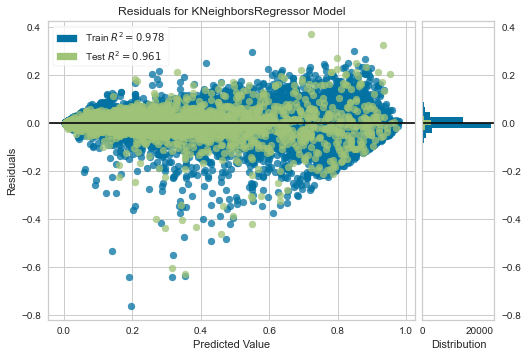

<AxesSubplot:title={'center':'Residuals for KNeighborsRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [90]:
# Instantiate the visualizer
model_KNN = KNeighborsRegressor()
visualizer_KNN = ResidualsPlot(model_KNN)

visualizer_KNN.fit(X_train_p, y_train_p)
visualizer_KNN.score(X_test_p, y_test_p)
visualizer_KNN.show()

C:\Users\David\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


<AxesSubplot:title={'center':'Prediction Error for KNeighborsRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

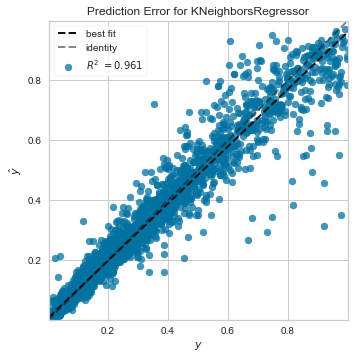

In [91]:
visualizer_KNN_pred = PredictionError(model_KNN) 
# fit visualizer on training data
visualizer_KNN_pred.fit(X_train_p, y_train_p) 
#Evaluate on test data
visualizer_KNN_pred.score(X_test_p, y_test_p)
#show the plot and save in given path
visualizer_KNN_pred.show("prediction_error.jpg")

Overall, this model is pretty good with an R2 score of .97 and RMSE of 510.
It is our most accurate model thus far.

### Random Forest Regressor

In [92]:
pipe_RFR = make_pipeline(preprocessor , StandardScaler(), RandomForestRegressor(n_estimators=100,random_state=0))
pipe_RFR.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['cut', 'color', 'clarity']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer())]),
                                                  ['carat', 'depth', 'table',
                                                   'length', 'width',
                                                   'height'])])),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=0))])

In [93]:
print("Score with Random Forest Regressor: {:.3f}".format(
   pipe_RFR.score(X_test, y_test)))

Score with Random Forest Regressor: 0.980


In [94]:
pred = pipe_RFR.predict(X_test)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE Score: % f" %(rmse))

RMSE Score:  383.812665


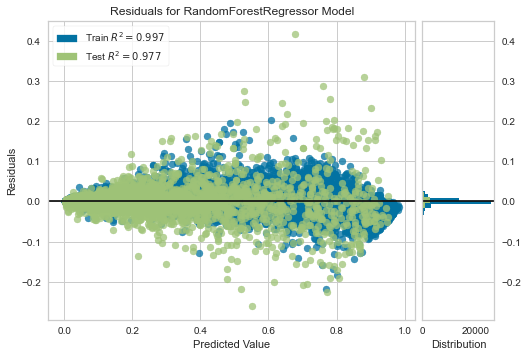

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [95]:
# Instantiate the visualizer
model_RF = RandomForestRegressor(n_estimators=100)
visualizer_RF = ResidualsPlot(model_RF)

visualizer_RF.fit(X_train_p, y_train_p)
visualizer_RF.score(X_test_p, y_test_p)
visualizer_RF.show()

C:\Users\David\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

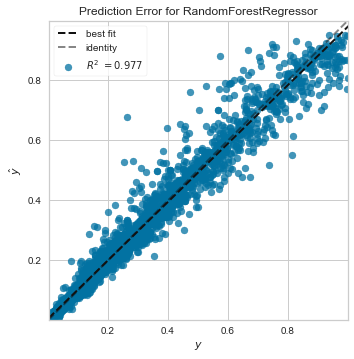

In [96]:
visualizer_RF_pred = PredictionError(model_RF) 
# fit visualizer on training data
visualizer_RF_pred.fit(X_train_p, y_train_p) 
#Evaluate on test data
visualizer_RF_pred.score(X_test_p, y_test_p)
#show the plot and save in given path
visualizer_RF_pred.show("prediction_error.jpg")

From the Prediction error graph, we see a a strong correlation between the model's predictions and its actual results. This is the best model for this dataset uptil now.

But in the residual plot, we see the points are not symmetrically distributed and have a few outliers. Since there is no clear pattern in our residual plot, there is room for improvement and we should try other models.

### Random Forest Regressor with Polynomial Features

In [97]:
pipe_RFR_Poly = make_pipeline(preprocessor, PolynomialFeatures(), StandardScaler(),RandomForestRegressor(n_estimators=100,random_state=0))
param_grid_RFR_Poly = {'polynomialfeatures__degree': range(1,2,3)}

grid_RFR_Poly = GridSearchCV(pipe_RFR_Poly, param_grid=param_grid_RFR_Poly, cv=3, n_jobs=-2,return_train_score=True)
grid_RFR_Poly.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['cut',
                                                                          'color',
                                                                          'clarity']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler()),
                                                                                         ('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         ['carat',
                                                                          'depth',
                                                                          'table',
                                                                          'length',
                                                                          'width',
                                                                          'height'])])),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=0))]),
             n_jobs=-2,
             param_grid={'polynomialfeatures__degree': range(1, 2, 3)},
             return_train_score=True)

In [98]:
result_RFR_Poly = pd.DataFrame(grid_RFR_Poly.cv_results_)
result_RFR_Poly

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_polynomialfeatures__degree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,10.880919,0.00328,0.312636,0.003769,1,{'polynomialfeatures__degree': 1},0.979778,0.979879,0.980713,0.980123,0.000419,1,0.997233,0.99728,0.997237,0.99725,0.000021


In [99]:
grid_RFR_Poly.best_params_

{'polynomialfeatures__degree': 1}

In [100]:
grid_RFR_Poly.best_score_

0.9801232488153576

In [101]:
print("Score with RFR and Polynomial Regression: {:.2f}".format(grid_RFR_Poly.score(X_test, y_test)))

Score with RFR and Polynomial Regression: 0.98


In [102]:
pred = grid_RFR_Poly.predict(X_test)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE Score: % f" %(rmse))

RMSE Score:  385.722569


### Support Vector Regressor

In [103]:
pipe_SVR = make_pipeline(preprocessor , StandardScaler(),SVR(max_iter=500000))
param_grid_SVR = {'svr__C': range(1,3), 'svr__epsilon': [0.01,0.05,0.1,0.5]}

grid_SVR= GridSearchCV(pipe_SVR, param_grid=param_grid_SVR, cv=3, n_jobs=-2,return_train_score=True)
grid_SVR.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['cut',
                                                                          'color',
                                                                          'clarity']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler()),
                                                                                         ('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         ['carat',
                                                                          'depth',
                                                                          'table',
                                                                          'length',
                                                                          'width',
                                                                          'height'])])),
                                       ('standardscaler', StandardScaler()),
                                       ('svr', SVR(max_iter=500000))]),
             n_jobs=-2,
             param_grid={'svr__C': range(1, 3),
                         'svr__epsilon': [0.01, 0.05, 0.1, 0.5]},
             return_train_score=True)

In [104]:
result_SVR = pd.DataFrame(grid_SVR.cv_results_)
result_SVR

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svr__C,param_svr__epsilon,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,199.004135,0.264827,90.338393,0.717268,1,0.01,"{'svr__C': 1, 'svr__epsilon': 0.01}",0.372273,0.374209,0.380108,0.375530,0.003332,6,0.376290,0.374675,0.376421,0.375795,0.000794
1,198.995207,0.137791,90.381709,0.342799,1,0.05,"{'svr__C': 1, 'svr__epsilon': 0.05}",0.372275,0.374203,0.380107,0.375528,0.003332,8,0.376293,0.374669,0.376420,0.375794,0.000797
2,199.248002,0.308045,89.693593,0.854504,1,0.1,"{'svr__C': 1, 'svr__epsilon': 0.1}",0.372283,0.374198,0.380104,0.375529,0.003329,7,0.376300,0.374664,0.376418,0.375794,0.000800
3,198.695624,0.671296,91.338823,0.269207,1,0.5,"{'svr__C': 1, 'svr__epsilon': 0.5}",0.372309,0.374168,0.380115,0.375531,0.003330,5,0.376327,0.374634,0.376429,0.375796,0.000823
4,192.669228,0.376160,90.043934,0.778501,2,0.01,"{'svr__C': 2, 'svr__epsilon': 0.01}",0.541272,0.544561,0.550562,0.545465,0.003846,2,0.547492,0.543325,0.546609,0.545809,0.001793
5,110.950979,0.374365,52.907947,0.207569,2,0.05,"{'svr__C': 2, 'svr__epsilon': 0.05}",0.541273,0.544561,0.550559,0.545464,0.003844,3,0.547494,0.543325,0.546606,0.545808,0.001793
6,110.522931,0.786313,53.879960,1.492354,2,0.1,"{'svr__C': 2, 'svr__epsilon': 0.1}",0.541273,0.544562,0.550555,0.545463,0.003843,4,0.547493,0.543326,0.546602,0.545807,0.001792
7,109.379983,0.491028,53.550433,1.860987,2,0.5,"{'svr__C': 2, 'svr__epsilon': 0.5}",0.541276,0.544577,0.550549,0.545467,0.003838,1,0.547497,0.543340,0.546596,0.545811,0.001785


In [105]:
grid_SVR.best_params_

{'svr__C': 2, 'svr__epsilon': 0.5}

In [106]:
grid_SVR.best_score_

0.5454670286612815

In [107]:
print("Score with Support Vector Regression: {:.2f}".format(grid_SVR.score(X_test, y_test)))

Score with Support Vector Regression: 0.64


In [108]:
pred = grid_SVR.predict(X_test)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE Score: % f" %(rmse))

RMSE Score:  1651.655042


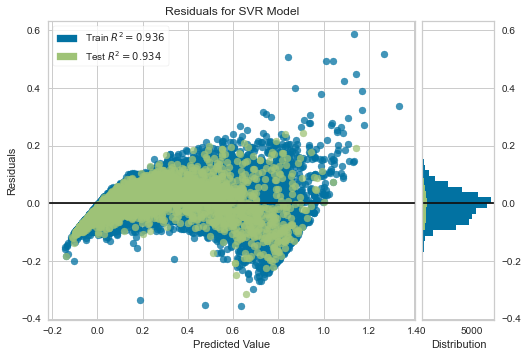

<AxesSubplot:title={'center':'Residuals for SVR Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [109]:
# Instantiate the visualizer
model_SVR = SVR(max_iter=500000)
visualizer_SVR = ResidualsPlot(model_SVR)

visualizer_SVR.fit(X_train_p, y_train_p)
visualizer_SVR.score(X_test_p, y_test_p)
visualizer_SVR.show()

C:\Users\David\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


<AxesSubplot:title={'center':'Prediction Error for SVR'}, xlabel='$y$', ylabel='$\\hat{y}$'>

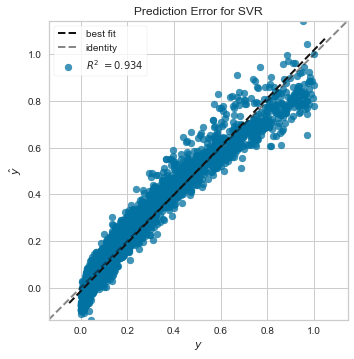

In [110]:
visualizer_SVR_pred = PredictionError(model_SVR) 
# fit visualizer on training data
visualizer_SVR_pred.fit(X_train_p, y_train_p) 
#Evaluate on test data
visualizer_SVR_pred.score(X_test_p, y_test_p)
#show the plot and save in given path
visualizer_SVR_pred.show("prediction_error.jpg")

From the residual graph, we can see the curved plot which indicates that this is not the best model for our dataset. It is however better at detecting outliers. Performance on this model has been the worst so far with very high RMSE and low R2.  Random Forest is the best model till now.

### Support Vector Regressor with Polynomial Features

In [111]:
pipe_SVR_Poly = make_pipeline(preprocessor, PolynomialFeatures(), StandardScaler(),SVR(max_iter=500000))
param_grid_SVR_Poly = {'polynomialfeatures__degree': range(1,2,3),'svr__C': range(1,3), 'svr__epsilon': [0.05,0.1,0.5,1]}

grid_SVR_Poly = GridSearchCV(pipe_SVR_Poly, param_grid=param_grid_SVR_Poly, cv=3, n_jobs=-2,return_train_score=True)
grid_SVR_Poly.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['cut',
                                                                          'color',
                                                                          'clarity']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler()),
                                                                                         ('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         ['carat',
                                                                          'depth',
                                                                          'table',
                                                                          'length',
                                                                          'width',
                                                                          'height'])])),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('svr', SVR(max_iter=500000))]),
             n_jobs=-2,
             param_grid={'polynomialfeatures__degree': range(1, 2, 3),
                         'svr__C': range(1, 3),
                         'svr__epsilon': [0.05, 0.1, 0.5, 1]},
             return_train_score=True)

In [112]:
result_SVR_Poly = pd.DataFrame(grid_SVR_Poly.cv_results_)
result_SVR_Poly

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_polynomialfeatures__degree,param_svr__C,param_svr__epsilon,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,210.791566,2.408008,95.701140,0.282742,1,1,0.05,"{'polynomialfeatures__degree': 1, 'svr__C': 1,...",0.372275,0.374203,0.380107,0.375528,0.003332,8,0.376293,0.374669,0.376420,0.375794,0.000797
1,209.870991,4.023256,95.256229,0.908861,1,1,0.1,"{'polynomialfeatures__degree': 1, 'svr__C': 1,...",0.372283,0.374198,0.380104,0.375529,0.003329,7,0.376300,0.374664,0.376418,0.375794,0.000800
2,207.279723,4.605670,95.417098,1.042349,1,1,0.5,"{'polynomialfeatures__degree': 1, 'svr__C': 1,...",0.372309,0.374168,0.380115,0.375531,0.003330,6,0.376327,0.374634,0.376429,0.375796,0.000823
3,211.937490,0.932025,95.385354,1.560375,1,1,1,"{'polynomialfeatures__degree': 1, 'svr__C': 1,...",0.372316,0.374182,0.380152,0.375550,0.003342,5,0.376335,0.374648,0.376465,0.375816,0.000827
4,207.478454,1.191687,95.218698,1.003215,1,2,0.05,"{'polynomialfeatures__degree': 1, 'svr__C': 2,...",0.541273,0.544561,0.550559,0.545464,0.003844,3,0.547494,0.543325,0.546606,0.545808,0.001793
5,120.411018,1.287554,58.374521,1.055438,1,2,0.1,"{'polynomialfeatures__degree': 1, 'svr__C': 2,...",0.541273,0.544562,0.550555,0.545463,0.003843,4,0.547493,0.543326,0.546602,0.545807,0.001792
6,119.252029,0.733643,58.076759,1.524173,1,2,0.5,"{'polynomialfeatures__degree': 1, 'svr__C': 2,...",0.541276,0.544577,0.550549,0.545467,0.003838,2,0.547497,0.543340,0.546596,0.545811,0.001785
7,117.205536,0.617308,58.385269,0.684406,1,2,1,"{'polynomialfeatures__degree': 1, 'svr__C': 2,...",0.541334,0.544575,0.550549,0.545486,0.003817,1,0.547555,0.543339,0.546596,0.545830,0.001804


In [113]:
grid_SVR_Poly.best_params_

{'polynomialfeatures__degree': 1, 'svr__C': 2, 'svr__epsilon': 1}

In [114]:
grid_SVR_Poly.best_score_

0.5454860490518604

In [115]:
print("Score with SVR and Polynomial Regression: {:.2f}".format(grid_SVR_Poly.score(X_test, y_test)))

Score with SVR and Polynomial Regression: 0.64


In [116]:
pred = grid_SVR_Poly.predict(X_test)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE Score: % f" %(rmse))

RMSE Score:  1651.725262


### Random Forest Regressor using Principal Component Analysis

In [117]:
pipe_RFR_PC = make_pipeline(preprocessor ,PCA(n_components=0.95), StandardScaler(), RandomForestRegressor(n_estimators=100,random_state=0))
pipe_RFR_PC.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['cut', 'color', 'clarity']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer())]),
                                                  ['carat', 'depth', 'table',
                                                   'length', 'width',
                                                   'height'])])),
                ('pca', PCA(n_components=0.95)),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=0))])

In [118]:
print("Score with Random Forest Regressor and PCA: {:.3f}".format(
   pipe_RFR_PC.score(X_test, y_test)))

Score with Random Forest Regressor and PCA: 0.967


In [119]:
pred = pipe_RFR_PC.predict(X_test)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE Score: % f" %(rmse))

RMSE Score:  500.331751


### XGBoost

In [120]:
pipe_XGB = make_pipeline(preprocessor , StandardScaler(),XGBRegressor(objective="reg:linear", random_state=0))
pipe_XGB.fit(X_train, y_train.values.ravel())

[01:02:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['cut', 'color', 'clarity']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer())]),
                                                  ['carat', '...
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=100, n_jobs=0, num_parallel_tree=1,
                              objective='reg:linear', predictor='auto',
                              random_state=0, reg_alpha=0, ...))])

In [121]:
print("Score with XGBoost Regressor: {:.3f}".format(
   pipe_XGB.score(X_test, y_test)))

Score with XGBoost Regressor: 0.980


In [122]:
pred = pipe_XGB.predict(X_test)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE Score: % f" %(rmse))

RMSE Score:  382.270577


### XGBoost with Polynomial Features

In [123]:
pipe_XGB_Poly = make_pipeline(preprocessor, PolynomialFeatures(), StandardScaler(),XGBRegressor(objective="reg:linear", random_state=0))
param_grid_XGB_Poly = {'polynomialfeatures__degree': range(1,3)}

grid_XGB_Poly = GridSearchCV(pipe_XGB_Poly, param_grid=param_grid_XGB_Poly, cv=3, n_jobs=-2,return_train_score=True)
grid_XGB_Poly.fit(X_train, y_train.values.ravel())

[01:03:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['cut',
                                                                          'color',
                                                                          'clarity']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler()),
                                                                                         ('simpleimputer',
                                                                                          S...
                                                     max_bin=None,
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     objective='reg:linear',
                                                     predictor=None,
                                                     random_state=0,
                                                     reg_alpha=None, ...))]),
             n_jobs=-2, param_grid={'polynomialfeatures__degree': range(1, 3)},
             return_train_score=True)

In [124]:
result_XGB_Poly = pd.DataFrame(grid_XGB_Poly.cv_results_)
result_XGB_Poly

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_polynomialfeatures__degree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.958472,0.016856,0.055552,0.000405,1,{'polynomialfeatures__degree': 1},0.979365,0.979492,0.980520,0.979792,0.000517,1,0.991525,0.991285,0.991814,0.991541,0.000216
1,29.997063,0.146987,0.295616,0.006048,2,{'polynomialfeatures__degree': 2},0.978215,0.978752,0.980501,0.979156,0.000976,2,0.992263,0.992823,0.992299,0.992462,0.000256


In [125]:
grid_XGB_Poly.best_params_

{'polynomialfeatures__degree': 1}

In [126]:
grid_XGB_Poly.best_score_

0.9797921780404892

In [127]:
print("Score with XGBoost and Polynomial Regression: {:.2f}".format(grid_XGB_Poly.score(X_test, y_test)))

Score with XGBoost and Polynomial Regression: 0.98


In [128]:
pred = grid_XGB_Poly.predict(X_test)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE Score: % f" %(rmse))

RMSE Score:  382.270577


Random Forest and XGBoost gave us the best R2 score at 0.98. This means that 98% of the variability observed in price can be explained by these two models, which is fairly good. However when you compare RMSE scores between these two models, XGBoost gave us a lower (although only slightly) RMSE score 382.2 compared to 383.8. Therefore, we can conclude that the best model to predict the prices of diamonds is XGBoost with a polynomial feature degree of 1. 